# Review
Hi, my name is Dmitry and I will be reviewing your project.
<div class="alert alert-info">
   Thanks for checking.<br />  
   Sorry, I probably commented badly on the code, and you got the impression that I was analyzing incorrectly grouped data. In fact, the analysis was done on correctly grouped data. Next I commented on your recommendations.<br />  
    I did not remove any code from the first version of the project, only at the end of Step2 I added a table without grouping by users.
</div>
You can find my comments in colored markdown cells:

<div class="alert alert-success">
    If everything is done succesfully.
</div>

<div class="alert alert-warning">
    If I have some (optional) suggestions, or questions to think about, or general comments.
</div>

<div class="alert alert-danger">
    If a section requires some corrections. Work can't be accepted with red comments.
</div>

Please don't remove my comments, as it will make further review iteration much harder for me.

Feel free to reply to my comments or ask questions using the following template:

<div class="alert alert-info">
    For your comments and questions.
</div>

First of all, thank you for turning in the project! You did a good job overall, there's just some minor confusion with the data aggregation that needs to be fixed. Should be pretty straightforward. Good luck!

<div class="alert alert-success">
    <b>V2.</b>
    Hi! Sorry for the misunderstanding of what data was used for analysis! The project is now accepted, and you can move on to the next sprint. Keep up the good work!
</div>

# Research of the profitability of tariff plans of the telecom operator Megaline

I work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans is more profitable in order to adjust the advertising budget.


##### Table of contents

0. [Introduction](#introduction)
1. [Opening data files and examining general information.](#opening_data)
2. [Data preprocessing](#data_preprocessing)
3. [Data analysis](#data_analysis)
4. [Hypothesis testing](#hypothesis_testing)
5. [Overall conclusion](#overall_conclusion)


### Introduction<a name="introduction"></a>
Task:

I work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans is more profitable in order to adjust the advertising budget.

I'm going to do a preliminary analysis of plans based on a relatively small sample of clients. I have data on 500 Megaline clients: who they are, where they are from, what tariff plan they use, as well as the number of calls they made and sent text messages in 2018. My task is to analyze customer behavior. and determine which prepaid plan is more beneficial.

<div class="alert alert-success">
    It's great that you have an introduction setting up the context and goals of the project!
</div>

### Step 1. Opening data files and examining general information.<a name="opening_data"></a>

In [1]:
import pandas   as pd
import math
from datetime import datetime
import numpy    as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
calls    = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_calls.csv')
internet = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_internet.csv')
message  = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_messages.csv')
plans    = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_plans.csv')
users    = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_users.csv')

# calls    = pd.read_csv('megaline_calls.csv')
# internet = pd.read_csv('megaline_internet.csv')
# message  = pd.read_csv('megaline_messages.csv')
# plans    = pd.read_csv('megaline_plans.csv')
# users    = pd.read_csv('megaline_users.csv')

pd.options.display.float_format = "{:.2f}".format

#data structure analysis
print('Calls: \n')
calls.info()
print('\n Internet: \n')
internet.info()
print('\n Message: \n')
message.info()
print('\n Plans: \n')
plans.info()
print('\n Users: ')
users.info()

Calls: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

 Internet: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

 Message: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #

We have 5 tables, the **"Users"** table has missing values in the **"churn_date"** column, there are no missing data in the other tables.


<div class="alert alert-success">
    Alright, you loaded the data and had a look at it!
</div>

### Step 2. Data preprocessing<a name="data_preprocessing"></a>

Let's check the data for duplicates, anomalous values, erroneously entered data and transform the data into the required types.

We will also find for each user:

- The number of calls made and minutes used per month
- The number of text messages sent per month
- The volume of data per month
- The monthly profit from each user


##### Calls


 0 duplicates in the "calls" table


<AxesSubplot:title={'center':'duration'}, ylabel='Frequency'>

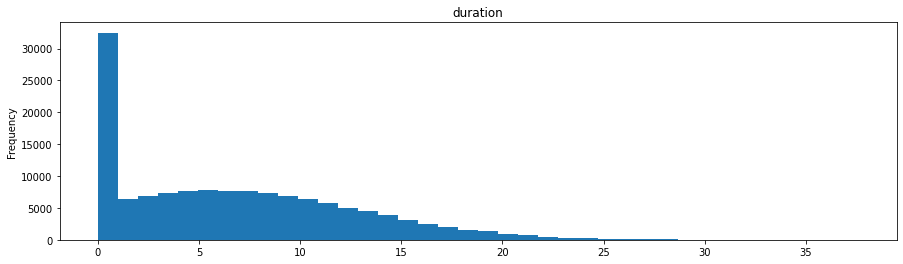

In [3]:
print('\n {:} duplicates in the "calls" table'.format(len(calls[calls.duplicated(keep=False)])))

calls['duration'].plot(
    kind     = 'hist'
    ,title   = 'duration'
    ,bins    = 38
    ,figsize = (15, 4)
)

In [4]:
print('\n {:} calls failed (duration = 0)'.
      format(len(calls.query('duration == 0'))))


 26834 calls failed (duration = 0)


**26834** records with call duration equal to **0**. I think these are not accepted calls. Let's delete these calls, otherwise they will distort the data on the number of calls from clients. No anomalies or missing data found.

<AxesSubplot:title={'center':'duration'}, ylabel='Frequency'>

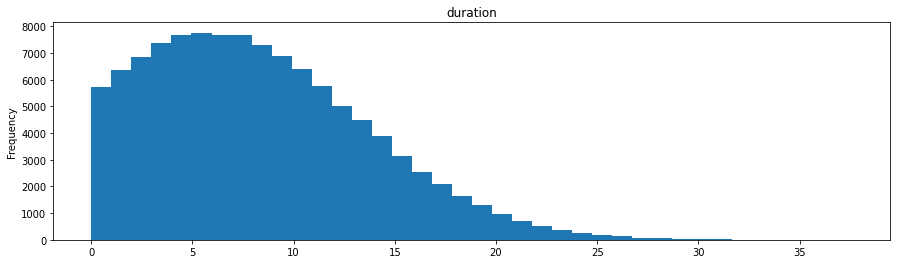

In [5]:
calls.drop(calls[calls['duration'] == 0].index, inplace=True)
calls['duration'].plot(
    kind     = 'hist'
    ,title   = 'duration'
    ,bins    = 38
    ,figsize = (15, 4)
)

No duplicates or missing values were found in the **"calls"**, **"internet"**, **"message"**, **"plans"** and **"users"** tables.

Let's proceed to the next part of this step.

#### The number of calls made and minutes used per month

Let's check if the data is entered correctly in the **"reg_date"** column of the **"users"** table. Let's find out if the client has used the services before the date indicated in the **"reg_date"** column.

In [6]:
def choose_min(user):
    month_C = calls[calls['user_id'] ==  user['user_id']]['call_date'].min()
    month_M = message[message['user_id'] ==  user['user_id']]['message_date'].min()
    month_I = internet[internet['user_id'] ==  user['user_id']]['session_date'].min()
    list = [] # we will collect the dates of the first call, message and Internet use and choose the smallest
    
    def convert_month_and_day(type_data):
        try: 
            month = datetime.strptime(type_data, '%Y-%m-%d').strftime("%m") 
            day   = datetime.strptime(type_data, '%Y-%m-%d').strftime("%d") 
            return (month,day,type_data)
        except: 
            return (0,0,0)

    (month,day,type_data) =  convert_month_and_day(month_C)   
    if month != 0:
        list.append((month,day,type_data))  
    
    (month,day,type_data) =  convert_month_and_day(month_M)   
    if month != 0:
        list.append((month,day,type_data))  
        
    (month,day,type_data) =  convert_month_and_day(month_I)   
    if month != 0:
        list.append((month,day,type_data))  

    if list:
        (_,_,c) = min(list)
        return c
    else:
        return 0

users['reg_month'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d').dt.month
users['first_date'] = users.apply(choose_min, axis = 1)

#delete all users without calls, messages and data
users.drop(users[users['first_date'] == 0].index, inplace=True)
users['first_month'] = pd.to_datetime(users['first_date'], format = '%Y-%m-%d').dt.month
users['first_day'] = pd.to_datetime(users['first_date'], format = '%Y-%m-%d').dt.day
try:
    users['first_month']  = users['first_month'] .astype('int')   
    users['first_day']    = users['first_day'] .astype('int')  
except: 
    print('Failed')
    
#delta between the first month of use and the month of the conclusion of the contract
users['delta_regMonth_useMonth'] = users['first_month'] - users['reg_month']
users[users['first_month'] > 0].groupby('delta_regMonth_useMonth')['reg_month'].count()



delta_regMonth_useMonth
0     247
1      49
2      38
3      27
4      38
5      24
6      21
7      11
8      17
9       8
10      6
11      4
Name: reg_month, dtype: int64

On the one hand, we see that the data in the column is correct (no negative delta). That is, there are no records where calls, messages or the Internet began to be used before the date of the contract. On the other hand, there are a lot of records **243** (49%), where the client signed a contract but did not use the services for many months. Most likely a data entry error, and this will prevent us from correctly recovering data for the first month. To correctly process the data for the first month, I added the columns **"first_month"** and **"first_day"**.

Let's check if the data is entered correctly in the **churn_date** column of the **users** table

In [7]:
# let's select the latest date for using the services
def choose_min(user):
    month_C = calls[calls['user_id']       ==  user['user_id']]['call_date'].max()
    month_M = message[message['user_id']   ==  user['user_id']]['message_date'].max()
    month_I = internet[internet['user_id'] ==  user['user_id']]['session_date'].max()
    list = []
    
    def convert_month(type_data):
        try: 
            month = datetime.strptime(month_C, '%Y-%m-%d').strftime("%m") 
            return month
        except: 
            return 0

    month =  convert_month(month_C)   
    if month != 0:
        list.append(month) 
        
    month =  convert_month(month_M)   
    if month != 0:
        list.append(month)  
    
    month =  convert_month(month_I)   
    if month != 0:
        list.append(month)  

    if list:
        return max(list)
    else:
        return 0

users['churn_month'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d').dt.month
users['last_month'] = users.apply(choose_min, axis = 1)

try:
    users['last_month']  = users['last_month'] .astype('int')   
except: 
    print('Failed')
#delta between the first month of use and the month of the conclusion of the contract
users['delta_churnM_useM'] = users['last_month'] - users['churn_month']
users[users['last_month'] > 0].groupby('delta_churnM_useM')['churn_month'].count()

delta_churnM_useM
0.00    12
1.00     9
2.00     5
3.00     4
4.00     2
Name: churn_month, dtype: int64

As we can see, part of the data in the **churn_month** column was entered incorrectly **(delta_churnM_useM > 0)**. The contract with the client has already been terminated, but the client continues to use tariff cellular communications. Let's delete the wrong data.

<div class="alert alert-success">
    Good catch!
</div>

In [8]:
users['churn_date'] = (
    users['churn_date']
    .where(users['delta_churnM_useM'] < 1, np.nan)
)
users['churn_month'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d').dt.month

users['delta_churnM_useM'] = users['last_month'] - users['churn_month']
users[users['last_month'] > 0].groupby('delta_churnM_useM')['churn_month'].count()

delta_churnM_useM
0.00    12
Name: churn_month, dtype: int64

As we can see, there is no incorrect data in the churn_month column of the users table. However, there are only **12** records with information about the termination of cooperation, and this is negligible. It is possible to disregard these data, they are not relevant for the analysis of the entire sample.

Having determined the correct start date for using the service, we will continue to process the data in the **"calls"** table to answer the question.

In [9]:
#let's round up the duration of calls to the minute up
calls['duration'] = np.ceil(calls['duration'])
#let's create a column month
calls['month'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d').dt.month
calls_pivot = calls.pivot_table(index = ['user_id','month'], 
                                values = 'duration', 
                                aggfunc = ['count','sum'])
calls_pivot.columns = ['count_calls','duration_calls']
calls_pivot

count_calls  duration_calls
user_id month                             
1000    12              16          124.00
1001    8               22          182.00
        9               38          315.00
        10              47          393.00
        11              49          426.00
...                    ...             ...
1498    12              32          339.00
1499    9               35          346.00
        10              41          385.00
        11              39          308.00
        12              56          496.00

[2256 rows x 2 columns]

We received information about the number of calls and their duration per month, but to calculate the average, we need to normalize the data for the first and last month of using the service.

To do this, we will calculate the **multiplier** based on the date and correct the data.

#### Create a multiplier for the last month for users who stopped

In [10]:
#dict with information on how many days each month
day_in_month_dict = {1:31, 2: 28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}

users['churn_month'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d').dt.month
users['churn_day']   = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d').dt.day
users['churn_month'] = users['churn_month'].fillna(value = 0)

try:
    users['churn_month']  = users['churn_month'] .astype('int') 
except: 
    print('Failed')
    
def calculate_multiplier(item):
    if item['churn_month'] > 0:
        return (day_in_month_dict[item['churn_month']] - item['churn_day']+1) / day_in_month_dict[item['churn_month']]
    else:
        return np.nan

users['last_month_multiplier'] = users.apply(calculate_multiplier, axis=1)

users_last_month = (
    users[users['churn_day'].notna()]
    .pivot_table(index = ['user_id','churn_month'],
                 values = 'last_month_multiplier',
                 aggfunc = ['first']
                )
)
users_last_month.columns = ['last_month_multiplier']

users_last_month

,,last_month_multiplier
user_id,churn_month,
1006,12,0.45
1040,12,0.06
1054,12,0.03
1083,12,0.45
1094,12,0.65
1180,12,0.32
1186,12,0.03
1296,12,0.45
1298,12,0.42


In [11]:
calls_pivot['last_month_multiplier'] = users_last_month['last_month_multiplier']
# result = pd.concat([calls_pivot, users_last_month], axis=1, sort=False)
calls_pivot.sort_values(by = 'last_month_multiplier')

count_calls  duration_calls  last_month_multiplier
user_id month                                                    
1054    12              48          461.00                   0.03
1186    12              13           91.00                   0.03
1040    12              30          294.00                   0.06
1402    12              47          398.00                   0.19
1180    12              64          615.00                   0.32
...                    ...             ...                    ...
1498    12              32          339.00                    NaN
1499    9               35          346.00                    NaN
        10              41          385.00                    NaN
        11              39          308.00                    NaN
        12              56          496.00                    NaN

[2256 rows x 3 columns]

#### Create a multiplier for the first month

In [12]:
users['reg_day']   = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d').dt.day
#choose which date is earlier, what is recorded in the call table or the actual date of the start of use
users['rigth_first_month'] = (
    users['reg_month']
    .where(users['reg_month'] == users['first_month'], users['first_month'])
)

def calculate_multiplier2(item):
    if item['reg_month'] != item['first_month']:
        return (day_in_month_dict[item['first_month']] - item['first_day']+1) / day_in_month_dict[item['first_month']]
    else:
        return (day_in_month_dict[item['reg_month']] - item['reg_day']+1) / day_in_month_dict[item['reg_month']]

users['first_month_multiplier'] = users.apply(calculate_multiplier2, axis=1)

users_first_month = (
    users.pivot_table(index = ['user_id','rigth_first_month'],
                      values = 'first_month_multiplier',
                      aggfunc = ['first']
                     )
)
users_first_month.columns = ['first_month_multiplier']

users_first_month.head(10)


,,first_month_multiplier
user_id,rigth_first_month,
1000,12,0.26
1001,8,0.61
1002,10,0.35
1003,12,0.48
1004,5,0.29
1005,12,0.32
1006,11,0.13
1007,8,0.87
1008,10,0.87


In [13]:
#let's merge tables
calls_pivot['first_month_multiplier'] = users_first_month['first_month_multiplier']
# result = pd.concat([calls_pivot, users_last_month], axis=1, sort=False)
calls_pivot

count_calls  duration_calls  last_month_multiplier  \
user_id month                                                       
1000    12              16          124.00                    NaN   
1001    8               22          182.00                    NaN   
        9               38          315.00                    NaN   
        10              47          393.00                    NaN   
        11              49          426.00                    NaN   
...                    ...             ...                    ...   
1498    12              32          339.00                    NaN   
1499    9               35          346.00                    NaN   
        10              41          385.00                    NaN   
        11              39          308.00                    NaN   
        12              56          496.00                    NaN   

               first_month_multiplier  
user_id month                          
1000    12                       0.26  
1001    8                        0.61  
        9                         NaN  
        10                        NaN  
        11                        NaN  
...                               ...  
1498    12                        NaN  
1499    9                        0.93  
        10                        NaN  
        11                        NaN  
        12                        NaN  

[2256 rows x 4 columns]

Let's delete auxiliary columns from the table **"users"**

In [14]:
users.drop(['first_date', 
            'first_month',
            'first_day',
            'delta_regMonth_useMonth',
            'churn_month',
            'last_month',
            'delta_churnM_useM',
            'churn_day',
            'reg_day',
            'rigth_first_month',
            'reg_month'
           ], axis='columns', inplace=True)

##### Let's using a multiplier to normalize the data

In [15]:
def fill_data(type_data,type_multiplier):
    def check_is_m(item):
        if item[type_multiplier] == item[type_multiplier]:
            return int(item[type_data]/item[type_multiplier])
        else:
            return item[type_data]     
    calls_pivot[type_data] = calls_pivot.apply(check_is_m, axis=1)      

fill_data('duration_calls','first_month_multiplier')
fill_data('count_calls','first_month_multiplier')
fill_data('duration_calls','last_month_multiplier')
fill_data('count_calls','last_month_multiplier')
calls_pivot

count_calls  duration_calls  last_month_multiplier  \
user_id month                                                       
1000    12           62.00          480.00                    NaN   
1001    8            35.00          296.00                    NaN   
        9            38.00          315.00                    NaN   
        10           47.00          393.00                    NaN   
        11           49.00          426.00                    NaN   
...                    ...             ...                    ...   
1498    12           32.00          339.00                    NaN   
1499    9            37.00          370.00                    NaN   
        10           41.00          385.00                    NaN   
        11           39.00          308.00                    NaN   
        12           56.00          496.00                    NaN   

               first_month_multiplier  
user_id month                          
1000    12                       0.26  
1001    8                        0.61  
        9                         NaN  
        10                        NaN  
        11                        NaN  
...                               ...  
1498    12                        NaN  
1499    9                        0.93  
        10                        NaN  
        11                        NaN  
        12                        NaN  

[2256 rows x 4 columns]

Let's create a pivot table for each user.

In [16]:
users_summary_used = (
    calls_pivot.pivot_table(index = 'user_id',
                            values = ['count_calls','duration_calls'],
                            aggfunc = 'mean')    
)
users_summary_used

,count_calls,duration_calls
user_id,,
1000,62.00,480.00
1001,43.00,368.40
1002,36.00,312.00
1003,243.00,2281.00
1004,44.00,405.38
...,...,...
1495,53.00,449.50
1496,35.40,324.60
1497,59.00,422.00


##### The number of text messages sent per month

In [17]:
message['month'] = pd.to_datetime(message['message_date'], format = '%Y-%m-%d').dt.month

message_pivot = message.pivot_table(index = ['user_id','month'], 
                                    values = 'message_date', 
                                    aggfunc = 'count')
message_pivot.columns = ['count_messages']
message_pivot

count_messages
user_id month                
1000    12                 11
1001    8                  30
        9                  44
        10                 53
        11                 36
...                       ...
1496    9                  21
        10                 18
        11                 13
        12                 11
1497    12                 50

[1806 rows x 1 columns]

In [18]:
# Let's add multiplier for data recovery

message_pivot['last_month_multiplier']  = users_last_month['last_month_multiplier']
message_pivot['first_month_multiplier'] = users_first_month['first_month_multiplier']

#Using a multiplier to normalize the data
def fill_data(type_data,type_multiplier):
    def check_is_m(item):
        if item[type_multiplier] == item[type_multiplier]:
            return int(item[type_data]/item[type_multiplier])
        else:
            return item[type_data]     
    message_pivot[type_data] = message_pivot.apply(check_is_m, axis=1)      

fill_data('count_messages','first_month_multiplier')
fill_data('count_messages','last_month_multiplier')
message_pivot

count_messages  last_month_multiplier  first_month_multiplier
user_id month                                                               
1000    12              42.00                    NaN                    0.26
1001    8               48.00                    NaN                    0.61
        9               44.00                    NaN                     NaN
        10              53.00                    NaN                     NaN
        11              36.00                    NaN                     NaN
...                       ...                    ...                     ...
1496    9               21.00                    NaN                     NaN
        10              18.00                    NaN                     NaN
        11              13.00                    NaN                     NaN
        12              11.00                    NaN                     NaN
1497    12              70.00                    NaN                    0.71

[1806 rows x 3 columns]

Let's group the data and add it to the **users_summary_used table**

In [19]:
message_summary = (
    message_pivot.pivot_table(index = 'user_id',
                              values = 'count_messages',
                              aggfunc = 'mean')    
)

users_summary_used['count_messages'] = message_summary['count_messages']
users_summary_used

,count_calls,duration_calls,count_messages
user_id,,,
1000,62.00,480.00,42.00
1001,43.00,368.40,45.00
1002,36.00,312.00,38.33
1003,243.00,2281.00,103.00
1004,44.00,405.38,24.25
...,...,...,...
1495,53.00,449.50,NaN
1496,35.40,324.60,13.40
1497,59.00,422.00,70.00


##### The volume of data per month

In [20]:
internet['month'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d').dt.month

internet_pivot = internet.pivot_table(index = ['user_id','month'], 
                                      values = 'mb_used', 
                                      aggfunc = 'sum')
internet_pivot.columns = ['total_mb_used']
internet_pivot

total_mb_used
user_id month               
1000    12           1901.47
1001    8            6919.15
        9           13314.82
        10          22330.49
        11          18504.30
...                      ...
1498    12          23137.69
1499    9           12984.76
        10          19492.43
        11          16813.83
        12          22059.21

[2277 rows x 1 columns]

In [21]:
# Let's add multiplier for data recovery

internet_pivot['last_month_multiplier']  = users_last_month['last_month_multiplier']
internet_pivot['first_month_multiplier'] = users_first_month['first_month_multiplier']

# Using a multiplier to normalize the data
def fill_data(type_data,type_multiplier):
    def check_is_m(item):
        if item[type_multiplier] == item[type_multiplier]:
            return int(item[type_data]/item[type_multiplier])
        else:
            return item[type_data]     
    internet_pivot[type_data] = internet_pivot.apply(check_is_m, axis=1)      

fill_data('total_mb_used','first_month_multiplier')
fill_data('total_mb_used','last_month_multiplier')
internet_pivot

total_mb_used  last_month_multiplier  first_month_multiplier
user_id month                                                              
1000    12           7368.00                    NaN                    0.26
1001    8           11289.00                    NaN                    0.61
        9           13314.82                    NaN                     NaN
        10          22330.49                    NaN                     NaN
        11          18504.30                    NaN                     NaN
...                      ...                    ...                     ...
1498    12          23137.69                    NaN                     NaN
1499    9           13912.00                    NaN                    0.93
        10          19492.43                    NaN                     NaN
        11          16813.83                    NaN                     NaN
        12          22059.21                    NaN                     NaN

[2277 rows x 3 columns]

We will process the data according to the tariff plan. (round up to Gb)

In [22]:
mb_in_gb = 1024
internet_pivot['total_gb_used'] = np.ceil(internet_pivot['total_mb_used']/mb_in_gb)

Let's group the data and add it to the **users_summary_used** table

In [23]:
internet_summary = (
    internet_pivot.pivot_table(index = 'user_id',
                              values = 'total_gb_used',
                              aggfunc = 'mean')    
)
users_summary_used['total_gb_used'] = internet_summary['total_gb_used']
users_summary_used


,count_calls,duration_calls,count_messages,total_gb_used
user_id,,,,
1000,62.00,480.00,42.00,8.00
1001,43.00,368.40,45.00,17.20
1002,36.00,312.00,38.33,17.67
1003,243.00,2281.00,103.00,55.00
1004,44.00,405.38,24.25,21.62
...,...,...,...,...
1495,53.00,449.50,NaN,25.25
1496,35.40,324.60,13.40,15.60
1497,59.00,422.00,70.00,16.00


<div class="alert alert-danger">
    <s>The monthly usage data was aggregated correctly (in the calls_pivot, messages_pivot and internet_pivot dataframes), but then it was for some reason averaged by user_id. We would like to just merge calls_pivot, messages_pivot and internet_pivot on user_id+month and use that data for further analysis. Another small point: as you converted mb to gb, it would be better to rename the column to total_gb_used, otherwise it is a bit confusing.
</div>

<div class="alert alert-info">
    Unfortunately I forgot to rename the column. Of course I need to do it. <br /> 
    I grouped the additional users_summary_used table by user, as I thought management wanted to see a summary table by customer. This pivot table [users_summary_used] was not used in the following Steps, but only data from pivot tables [calls_pivot, messages_pivot, internet_pivot] <br />
    I corrected this section and added the needed table at the end. <br /> The text with links cannot be placed in this block, so I am placing it in the next one. (No blue background)
</div>


<div class="alert alert-success">
    <b>V2.</b>
    Oh, I see! Sorry for this misunderstanding!
</div>

In ["Step 4"](#step4) I specifically indicated that the data obtained in "Step 2" are not suitable for testing a hypothesis, and grouped the table for hypothesis analysis additionally.

##### Profit

In [24]:
users_summary_used = users_summary_used.reset_index(drop=False)
users_summary_used.fillna(0, inplace=True)

def calculate_profit(item):
    def positive_result(number):
        if number < 0:
            return 0
        else:
            return number
    
    plan = users[users['user_id'] == item['user_id']]['plan'].min()
    tariff = plans[plans['plan_name'] == plan]

    #included
    minutes_included  = tariff['minutes_included'].min()
    messages_included = tariff['messages_included'].min()
    data_included     = tariff['mb_per_month_included'].min() / mb_in_gb

    #rest
    minutes_not_included  = positive_result( item['duration_calls'] - minutes_included )
    messages_not_included = positive_result( item['count_messages'] - messages_included )
    data_not_included     = positive_result( item['total_gb_used']  - data_included )
    #calculate profit
    profit = ( 
        tariff['usd_monthly_pay'].min() 
        + minutes_not_included  * tariff['usd_per_minute'].min()
        + messages_not_included * tariff['usd_per_message'].min()
        + data_not_included     * tariff['usd_per_gb'].min()
    )
    return profit

users_summary_used['profit'] = users_summary_used.apply(calculate_profit, axis=1)   
users_summary_used

,user_id,count_calls,duration_calls,count_messages,total_gb_used,profit
0,1000,62.00,480.00,42.00,8.00,70.00
1,1001,43.00,368.40,45.00,17.20,42.00
2,1002,36.00,312.00,38.33,17.67,46.67
3,1003,243.00,2281.00,103.00,55.00,475.02
4,1004,44.00,405.38,24.25,21.62,86.25
...,...,...,...,...,...,...
476,1495,53.00,449.50,0.00,25.25,122.50
477,1496,35.40,324.60,13.40,15.60,26.00
478,1497,59.00,422.00,70.00,16.00,70.00
479,1498,34.00,294.55,0.00,20.91,79.09


I got a table **"users_summary_used"** with information for each user. This table shows the average number of calls per month, the number of messages, the amount of Internet used and the profit.

Converting data to the desired types

In [25]:
try: 
    calls['duration']   = calls['duration'].astype('int')
    internet['mb_used'] = internet['mb_used'].astype('int')
except: 
    print('Data conversion failed ((')


<div class="alert alert-danger">
    <s>The profit calculation function is correct, but it does not make sense to use it on the data averaged by user_id
</div>

<div class="alert alert-info">
    Added new code to create a table grouped by month.
</div>

<div class="alert alert-success">
    <b>V2.</b>
    Ok, great!
</div>

In [26]:
summary_month = (
    calls_pivot.pivot_table(index = ['user_id','month'],
                            values = 'duration_calls'))
summary_month['count_messages'] = (
    message_pivot.pivot_table(index = ['user_id','month'],
                              values = 'count_messages')['count_messages'])
summary_month['total_gb_used'] = (
    internet_pivot.pivot_table(index = ['user_id','month'],
                               values = 'total_gb_used')['total_gb_used'])

summary_month.fillna(0, inplace=True)
summary_month           = summary_month.reset_index(drop=False) 
summary_month['profit'] = summary_month.apply(calculate_profit, axis=1)  
summary_month

,user_id,month,duration_calls,count_messages,total_gb_used,profit
0,1000,12,480.00,42.00,8.00,70.00
1,1001,8,296.00,48.00,12.00,20.00
2,1001,9,315.00,44.00,14.00,20.00
3,1001,10,393.00,53.00,22.00,90.09
4,1001,11,426.00,36.00,19.00,60.00
...,...,...,...,...,...,...
2251,1498,12,339.00,0.00,23.00,100.00
2252,1499,9,370.00,0.00,14.00,20.00
2253,1499,10,385.00,0.00,20.00,70.00
2254,1499,11,308.00,0.00,17.00,40.00


### Step 3. Data analysis.<a name="data_analysis"></a>

In this part, we will describe customer behavior. We find out how many minutes, text messages and the amount of data required by users of each plan per month. We will calculate the mean, variance and standard deviation.

##### Call duration for  each plan 

In [27]:
# we will filter the data for each plan
# surf
plan_surf = users.query('plan == "surf"')['user_id']
calls_pivot_surf = calls_pivot.query('user_id in @plan_surf')
calls_pivot_surf.describe()

,count_calls,duration_calls,last_month_multiplier,first_month_multiplier
count,1544.00,1544.00,8.00,324.00
mean,57.21,510.88,0.32,0.53
std,61.39,589.29,0.21,0.28
min,1.00,2.00,0.03,0.03
25%,37.00,328.50,0.16,0.29
50%,53.00,466.00,0.37,0.53
75%,68.00,614.25,0.43,0.80
max,1596.00,15686.00,0.65,1.00


In [28]:
# ultimate
plan_ultimate = users.query('plan == "ultimate"')['user_id']
calls_pivot_ultimate = calls_pivot.query('user_id in @plan_ultimate')
calls_pivot_ultimate.describe()

,count_calls,duration_calls,last_month_multiplier,first_month_multiplier
count,712.00,712.00,4.00,150.00
mean,56.35,496.26,0.41,0.55
std,51.62,389.63,0.28,0.28
min,2.00,16.00,0.03,0.03
25%,37.00,320.75,0.35,0.30
50%,53.00,465.00,0.45,0.53
75%,69.00,606.75,0.52,0.77
max,1240.00,8742.00,0.71,1.00


Let's define the outliers limits

In [29]:
def outliers_lower_upper(name_df,column):
    q1 = name_df[column].quantile(0.25)
    q3 = name_df[column].quantile(0.75)
    iqr = q3 - q1
    if q1 - iqr*1.5 < 0:
        return (0, q3 + iqr*1.5)
    else:
        return (q1 - iqr*1.5, q3 + iqr*1.5)  

In [30]:
surf_duration_calls_outliers      = outliers_lower_upper(calls_pivot_surf,'duration_calls')
ultimate_duration_calls_outliers  = outliers_lower_upper(calls_pivot_ultimate,'duration_calls')
print('Outliers limit "Duration calls" for plan surf     ',surf_duration_calls_outliers)
print('Outliers limit "Duration calls" for plan ultimate ',ultimate_duration_calls_outliers)

Outliers limit "Duration calls" for plan surf      (0, 1042.875)
Outliers limit "Duration calls" for plan ultimate  (0, 1035.75)


Let's remove outliers.

In [31]:
calls_pivot_surf_filtered = (
    calls_pivot_surf.query('duration_calls < @surf_duration_calls_outliers[1]')
)
calls_pivot_surf_filtered.describe()


,count_calls,duration_calls,last_month_multiplier,first_month_multiplier
count,1503.00,1503.00,2.00,311.00
mean,52.68,467.79,0.44,0.53
std,22.01,199.42,0.02,0.28
min,1.00,2.00,0.42,0.03
25%,37.00,323.00,0.43,0.29
50%,52.00,458.00,0.44,0.55
75%,67.00,602.00,0.44,0.80
max,143.00,1039.00,0.45,1.00


In [32]:
calls_pivot_ultimate_filtered = (
    calls_pivot_ultimate.query('duration_calls < @ultimate_duration_calls_outliers[1]')
)
calls_pivot_ultimate_filtered.describe()

,count_calls,duration_calls,last_month_multiplier,first_month_multiplier
count,692.00,692.00,3.00,145.00
mean,52.45,464.84,0.54,0.56
std,22.72,206.49,0.15,0.28
min,2.00,16.00,0.45,0.03
25%,36.75,314.75,0.45,0.30
50%,52.00,461.50,0.45,0.57
75%,67.00,594.25,0.58,0.77
max,124.00,1035.00,0.71,1.00


Let's build histograms

<AxesSubplot:title={'center':'Call duration for Surf plan users'}, ylabel='Frequency'>

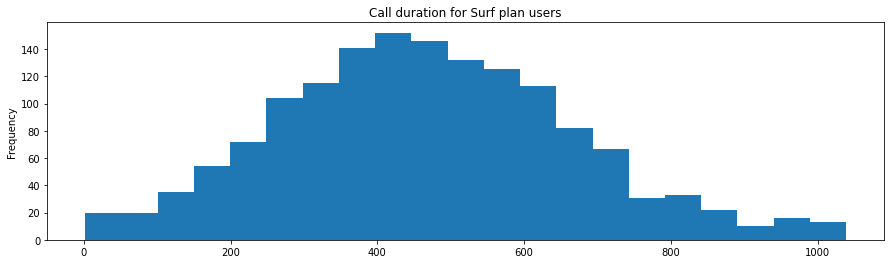

In [33]:
calls_pivot_surf_filtered['duration_calls'].plot(
    kind     = 'hist'
    ,title   = 'Call duration for Surf plan users'
    ,bins    = 21
    ,figsize = (15, 4)
 )

<AxesSubplot:title={'center':'Call duration for Ultimate plan users'}, ylabel='Frequency'>

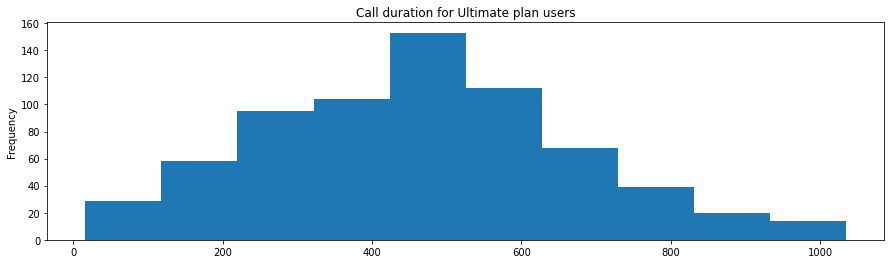

In [34]:
calls_pivot_ultimate_filtered['duration_calls'].plot(
    kind     = 'hist'
    ,title   = 'Call duration for Ultimate plan users'
    ,figsize = (15, 4)
)

##### Count of messages for each plan

In [35]:
# we will filter the data for each plan
message_pivot_surf = message_pivot.query('user_id in @plan_surf')
message_pivot_surf.describe()

,count_messages,last_month_multiplier,first_month_multiplier
count,1222.00,5.00,262.00
mean,46.66,0.37,0.52
std,49.24,0.22,0.28
min,1.00,0.03,0.03
25%,21.00,0.32,0.27
50%,36.00,0.42,0.52
75%,61.75,0.45,0.77
max,1147.00,0.65,1.00


In [36]:
message_pivot_ultimate = message_pivot.query('user_id in @plan_ultimate')
message_pivot_ultimate.describe()

,count_messages,last_month_multiplier,first_month_multiplier
count,584.00,4.00,127.00
mean,55.48,0.41,0.54
std,62.61,0.28,0.28
min,1.00,0.03,0.03
25%,27.00,0.35,0.30
50%,49.00,0.45,0.52
75%,72.00,0.52,0.75
max,1240.00,0.71,1.00


Let's remove outliers.

In [37]:
surf_message_outliers      = outliers_lower_upper(message_pivot_surf,'count_messages')
ultimate_message_outliers  = outliers_lower_upper(message_pivot_ultimate,'count_messages')
print('Outliers limit "Count messages" for plan surf     ',surf_message_outliers)
print('Outliers limit "Count messages" for plan ultimate ',ultimate_message_outliers)

Outliers limit "Count messages" for plan surf      (0, 122.875)
Outliers limit "Count messages" for plan ultimate  (0, 139.5)


In [38]:
message_pivot_surf_filtered = (
    message_pivot_surf.query('count_messages < @surf_message_outliers[1]')
)
message_pivot_surf_filtered.describe()


,count_messages,last_month_multiplier,first_month_multiplier
count,1167.00,2.00,248.00
mean,40.48,0.55,0.52
std,26.90,0.14,0.28
min,1.00,0.45,0.03
25%,20.00,0.50,0.29
50%,35.00,0.55,0.53
75%,56.00,0.60,0.78
max,121.00,0.65,1.00


In [39]:
message_pivot_ultimate_filtered = (
    message_pivot_ultimate.query('count_messages < @ultimate_message_outliers[1]')
)
message_pivot_ultimate_filtered.describe()

,count_messages,last_month_multiplier,first_month_multiplier
count,563.00,2.00,116.00
mean,49.01,0.58,0.55
std,29.95,0.18,0.28
min,1.00,0.45,0.03
25%,26.00,0.52,0.30
50%,47.00,0.58,0.54
75%,69.00,0.65,0.77
max,137.00,0.71,1.00


Let's build histograms

<AxesSubplot:title={'center':'Count messages for Surf plan users'}, ylabel='Frequency'>

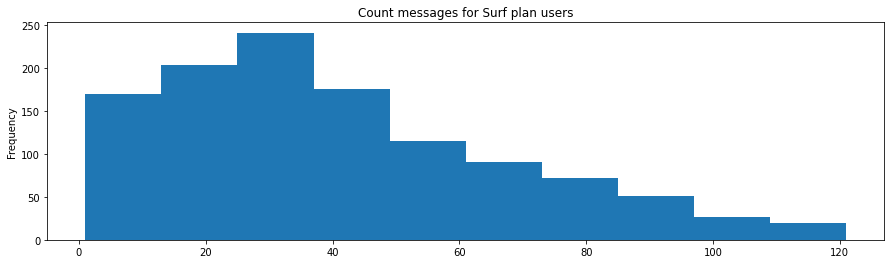

In [40]:
message_pivot_surf_filtered['count_messages'].plot(
    kind     = 'hist'
    ,title   = 'Count messages for Surf plan users'
    ,figsize = (15, 4)
 )

<AxesSubplot:title={'center':'Count messages for Ultimate plan users'}, ylabel='Frequency'>

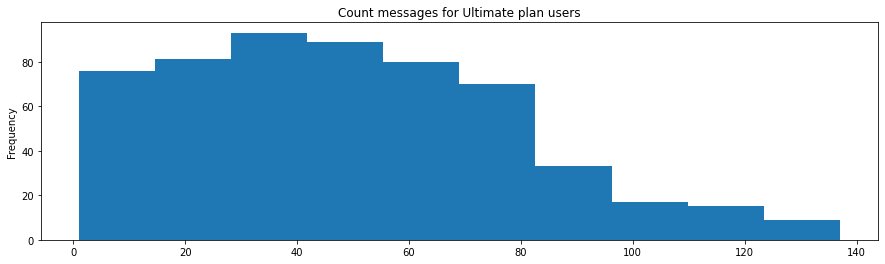

In [41]:
message_pivot_ultimate_filtered['count_messages'].plot(
    kind     = 'hist'
    ,title   = 'Count messages for Ultimate plan users'
    ,figsize = (15, 4)
 )

##### Count data for each plan

In [42]:
internet_pivot_surf = internet_pivot.query('user_id in @plan_surf')
internet_pivot_surf.describe()

,total_mb_used,last_month_multiplier,first_month_multiplier,total_gb_used
count,1558.00,8.00,326.00,1558.00
mean,19956.16,0.32,0.54,19.99
std,30564.05,0.21,0.28,29.86
min,626.94,0.03,0.03,1.00
25%,14155.20,0.16,0.29,14.00
50%,17844.91,0.37,0.55,18.00
75%,22140.20,0.43,0.80,22.00
max,905541.00,0.65,1.00,885.00


In [43]:
internet_pivot_ultimate = internet_pivot.query('user_id in @plan_ultimate')
internet_pivot_ultimate.describe()

,total_mb_used,last_month_multiplier,first_month_multiplier,total_gb_used
count,719.00,4.00,156.00,719.00
mean,19621.88,0.41,0.54,19.67
std,10477.73,0.28,0.28,10.22
min,560.33,0.03,0.03,1.00
25%,14656.29,0.35,0.30,15.00
50%,17904.50,0.45,0.52,18.00
75%,22835.74,0.52,0.77,23.00
max,187271.00,0.71,1.00,183.00


Let's remove outliers.

In [44]:
surf_internet_outliers      = outliers_lower_upper(internet_pivot_surf,'total_gb_used')
ultimate_internet_outliers  = outliers_lower_upper(internet_pivot_ultimate,'total_gb_used')
print('Outliers limit "Mb used" for plan surf     ',surf_internet_outliers)
print('Outliers limit "Mb used" for plan ultimate ',ultimate_internet_outliers)

Outliers limit "Mb used" for plan surf      (2.0, 34.0)
Outliers limit "Mb used" for plan ultimate  (3.0, 35.0)


In [45]:
internet_pivot_surf_filtered = (
    internet_pivot_surf.query('total_gb_used < @surf_internet_outliers[1] & total_gb_used > @surf_internet_outliers[0]  ')
)
internet_pivot_surf_filtered.describe()

,total_mb_used,last_month_multiplier,first_month_multiplier,total_gb_used
count,1462.00,0.00,289.00,1462.00
mean,17831.61,NaN,0.56,17.92
std,5863.14,NaN,0.28,5.74
min,2114.01,NaN,0.03,3.00
25%,14127.76,NaN,0.32,14.00
50%,17656.28,NaN,0.58,18.00
75%,21379.40,NaN,0.81,21.00
max,33644.72,NaN,1.00,33.00


In [46]:
internet_pivot_ultimate_filtered = (
    internet_pivot_ultimate.query('total_gb_used < @ultimate_internet_outliers[1] & total_gb_used > @ultimate_internet_outliers[0] ')
)
internet_pivot_ultimate_filtered.describe()

,total_mb_used,last_month_multiplier,first_month_multiplier,total_gb_used
count,680.00,2.00,144.00,680.00
mean,18291.72,0.58,0.55,18.37
std,5906.72,0.18,0.28,5.76
min,3278.00,0.45,0.03,4.00
25%,14461.10,0.52,0.30,15.00
50%,17521.08,0.58,0.53,18.00
75%,21621.60,0.65,0.77,22.00
max,34307.16,0.71,1.00,34.00


<AxesSubplot:title={'center':'The number of Gb used for users of the Surf tariff plan'}, ylabel='Frequency'>

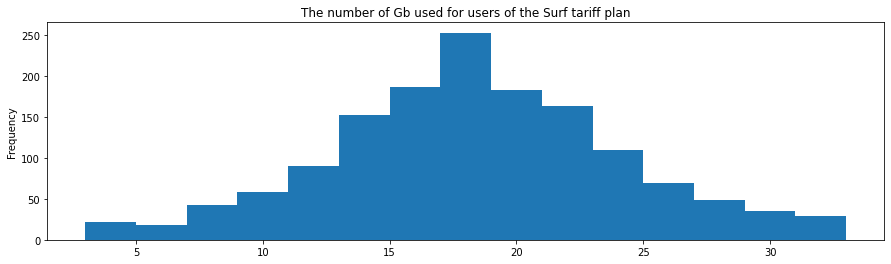

In [47]:
internet_pivot_surf_filtered['total_gb_used'].plot(
    kind     = 'hist'
    ,bins    =  15
    ,title   = 'The number of Gb used for users of the Surf tariff plan'
    ,figsize = (15, 4)
 )

<AxesSubplot:title={'center':'The number of Gb used for users of the Ultimate tariff plan'}, ylabel='Frequency'>

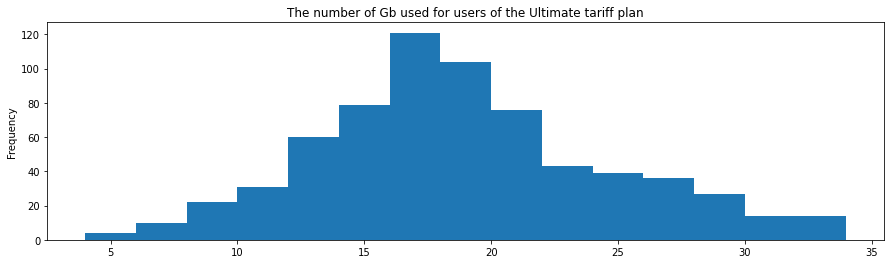

In [48]:
internet_pivot_ultimate_filtered['total_gb_used'].plot(
    kind     = 'hist'
    ,bins    =  15
    ,title   = 'The number of Gb used for users of the Ultimate tariff plan'
    ,figsize = (15, 4)
 )

##### Mean, variance and standart diviation

In [49]:
def get_together_param(type_data,name_df_first,name_df_second,name_column):
    data = (
        pd.DataFrame([[type_data,'surf',
                       name_df_first[name_column].mean(),
                       np.std(name_df_first[name_column]),
                       np.var(name_df_first[name_column])
                      ],
                      [type_data,'ultimate',
                       name_df_second[name_column].mean(),
                       np.std(name_df_second[name_column]),
                       np.var(name_df_second[name_column])
                      ]], columns = ['type','plan','mean','std','var']))    
    return data   

description_data = get_together_param('Calls',
                                      calls_pivot_surf_filtered,
                                      calls_pivot_ultimate_filtered,
                                      'duration_calls')
messages_data = get_together_param('Messages',
                                   message_pivot_surf_filtered,
                                   message_pivot_ultimate_filtered,
                                   'count_messages')
internet_data = get_together_param('Data',
                                   internet_pivot_surf_filtered,
                                   internet_pivot_ultimate_filtered,
                                   'total_gb_used')

description_data = description_data.append(messages_data, ignore_index=True)
description_data = description_data.append(internet_data, ignore_index=True)
description_data = description_data.pivot_table(index = ['type','plan'])
# description_data.style.set_properties(**{'text-align': 'right'})
description_data


mean    std      var
type     plan                           
Calls    surf     467.79 199.36 39742.64
         ultimate 464.84 206.34 42576.47
Data     surf      17.92   5.74    32.97
         ultimate  18.37   5.75    33.10
Messages surf      40.48  26.89   722.91
         ultimate  49.01  29.92   895.30

Conclusion:

The ratio of users of **“Surf”** and **“Ultimate”** tariff plans is **70%** to **30%**.

After removing emissions and filtering the data by the tariff plan, we see the following:
Users of both tariff plans spend on average the same number of minutes (**465**), despite the fact that the “Ultimate” tariff plan includes **3000** minutes of calls. You can also see that users of the **“Surf”** tariff plan try to keep within **500** minutes per month.

**Surf** and **Ultimate** users send **40** and **49** text messages per month. That is, users of the **“Surf”** tariff plan use almost all messages included in the tariff plan, while users of the **“Ultimate”** tariff plan use about **5%** of the number of messages included in the tariff plan.

On average, users use the same amount of Internet, and users of the **“Surf”** tariff plan additionally purchase **3 GB** per month, while users of the “Ultimate” tariff plan, who have **30 GB** of Internet enabled, spend on average **18.37 GB**.

**"Calls"** and **"Internet"** histograms have **"Normal Distribution"** type, and **"Message"** histograms have **"Right Skewed Distribution"** type.


<div class="alert alert-danger">
    <s>The statistics were calculated correctly, and the histograms were plotted, but again, as we previously averaged the data by user_id, we are now taking averages of the averages, and so on, which is not a good way to go about it. So, the conclusions would probably need to be revised on the new data.
</div>

<div class="alert alert-info">
    In this step does not analyze data grouped by user_id. If I'm wrong, then indicate where the data is used, grouped by user_id.
</div>


<div class="alert alert-success">
    <b>V2.</b>
    My bad! Sorry again for misunderstanding!
</div>

### Step 4. Hypothesis testing.<a name="hypothesis_testing"></a>

Consider 2 hypotheses:

- The average profit from users of Ultimate and Surf calling plans differs.
- The average profit from users in NY-NJ area is different from that of the users from other regions.   

<div class="alert alert-info">
    Below I indicate that the data created in the "Step2" part is not suitable for testing the hypothesis, and I form additional data for analysis.
</div>


<a name="step4"></a>
We need to prepare the data for further analysis. The data prepared in step 2 is not suitable, since it is grouped by users, but I need a user and a month.

In [50]:
#part 1. create outliers df
limits_surf = []
limits_surf.append(['duration_calls',surf_duration_calls_outliers[0],surf_duration_calls_outliers[1]])
limits_surf.append(['count_messages',surf_message_outliers[0],surf_message_outliers[1]])
limits_surf.append(['total_gb_used',surf_internet_outliers[0],surf_internet_outliers[1]])
limits_surf = pd.DataFrame(limits_surf, columns=['parameter','lower_fence','upper_fence'])

limits_ultimate = []
limits_ultimate.append(['duration_calls',ultimate_duration_calls_outliers[0],ultimate_duration_calls_outliers[1]])
limits_ultimate.append(['count_messages',ultimate_message_outliers[0],ultimate_message_outliers[1]])
limits_ultimate.append(['total_gb_used',ultimate_internet_outliers[0],ultimate_internet_outliers[1]])
limits_ultimate = pd.DataFrame(limits_ultimate, columns=['parameter','lower_fence','upper_fence'])
limits_ultimate

,parameter,lower_fence,upper_fence
0,duration_calls,0.00,1035.75
1,count_messages,0.00,139.50
2,total_gb_used,3.00,35.00


In [51]:
#part 2. create summary
# create summary data for surf plan
summary_surf = (
    calls_pivot_surf.pivot_table(index = ['user_id','month'],
                                 values = 'duration_calls'))
summary_surf['count_messages'] = (
    message_pivot_surf.pivot_table(index = ['user_id','month'],
                                   values = 'count_messages')['count_messages'])
summary_surf['total_gb_used'] = (
    internet_pivot_surf.pivot_table(index = ['user_id','month'],
                                    values = 'total_gb_used')['total_gb_used'])
summary_surf.fillna(0, inplace=True)

# create summary data for ultimate plan
summary_ultimate = (
    calls_pivot_ultimate.pivot_table(index = ['user_id','month'],
                                     values = 'duration_calls'))
summary_ultimate['count_messages'] = (
    message_pivot_ultimate.pivot_table(index = ['user_id','month'],
                                       values = 'count_messages')['count_messages'])
summary_ultimate['total_gb_used'] = (
    internet_pivot_ultimate.pivot_table(index = ['user_id','month'],
                                        values = 'total_gb_used')['total_gb_used'])
summary_ultimate.fillna(0, inplace=True)

summary_surf

duration_calls  count_messages  total_gb_used
user_id month                                               
1001    8              296.00           48.00          12.00
        9              315.00           44.00          14.00
        10             393.00           53.00          22.00
        11             426.00           36.00          19.00
        12             412.00           44.00          19.00
...                       ...             ...            ...
1498    12             339.00            0.00          23.00
1499    9              370.00            0.00          14.00
        10             385.00            0.00          20.00
        11             308.00            0.00          17.00
        12             496.00            0.00          22.00

[1544 rows x 3 columns]

Let's impose restrictions on the data obtained above

In [52]:
#right index after filtered
index_surf_filtered = (
    (summary_surf['duration_calls'] < limits_surf['upper_fence'][0])
    &
    (summary_surf['count_messages'] < limits_surf['upper_fence'][1])
    &
    (summary_surf['total_gb_used'] > limits_surf['lower_fence'][2])
    &
    (summary_surf['total_gb_used'] < limits_surf['upper_fence'][2])
)
    
index_ultimate_filtered = (
    (summary_ultimate['duration_calls'] < limits_ultimate['upper_fence'][0])
    &
    (summary_ultimate['count_messages'] < limits_ultimate['upper_fence'][1])
    &
    (summary_ultimate['total_gb_used'] > limits_ultimate['lower_fence'][2])
    &
    (summary_ultimate['total_gb_used'] < limits_ultimate['upper_fence'][2])
)

Let's calculate the profit for each tariff plan

In [53]:
summary_surf_filtered     = summary_surf[index_surf_filtered].reset_index(drop=False) 
summary_ultimate_filtered = summary_ultimate[index_ultimate_filtered].reset_index(drop=False) 

summary_surf_filtered['profit']     = summary_surf_filtered.apply(calculate_profit, axis=1)   
summary_ultimate_filtered['profit'] = summary_ultimate_filtered.apply(calculate_profit, axis=1)  
summary_ultimate_filtered

,user_id,month,duration_calls,count_messages,total_gb_used,profit
0,1000,12,480.00,42.00,8.00,70.00
1,1006,11,75.00,112.00,16.00,70.00
2,1008,10,546.00,24.00,20.00,70.00
3,1008,11,446.00,37.00,24.00,70.00
4,1008,12,634.00,26.00,15.00,70.00
...,...,...,...,...,...,...
639,1493,9,529.00,0.00,15.00,70.00
640,1493,10,450.00,0.00,16.00,70.00
641,1493,11,500.00,0.00,16.00,70.00
642,1493,12,473.00,0.00,15.00,70.00


<AxesSubplot:title={'center':'Profit distribution of users of the tariff plan "Surf"'}, ylabel='Frequency'>

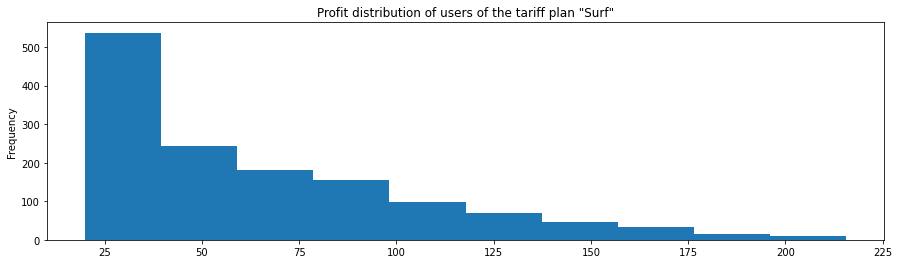

In [54]:
summary_surf_filtered['profit'].plot(
    kind     = 'hist'
    ,bins    = 10
    ,title   = 'Profit distribution of users of the tariff plan "Surf"'
    ,figsize = (15, 4)
 )

This graph tells us that the majority of the clients of the **"Surf"** tariff plan **83%**, do not fit into the allotted limits for calls, SMS and the Internet and have to buy additional services.

<AxesSubplot:title={'center':'Profit distribution of users of the tariff plan "Ultimate"'}, ylabel='Frequency'>

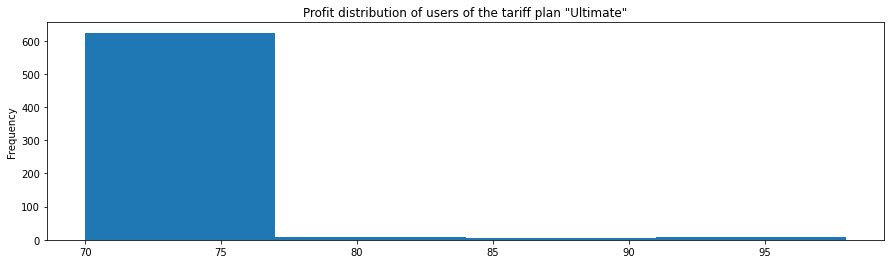

In [55]:
summary_ultimate_filtered['profit'].plot(
    kind     = 'hist'
    ,bins    = [70,77,84,91,98]
    ,title   = 'Profit distribution of users of the tariff plan "Ultimate"'
    ,figsize = (15, 4)
 )

This graph tells us that the overwhelming majority of users of the **"Ultimate"** tariff plan fit into the limits set by this plan.

The data is ready, now I can test hypotheses.

### The average profit from users of Ultimate and Surf calling plans differs.

**Hypothese Null**: The average profit of Ultimate equals the average profit of Surf. 

**Hypothese alternative**: The average profit of Ultimate is not equal the average profit of Surf. 

In this case:
**Hypothesis on the Equality of Two Population Means.**

Each sample has more than **50** records, which means the samples are large enough to test hypotheses.

Let's find out the variance for each samples.

Set "alpha" = 0.01

In [56]:
print('The variance "Surf" is {:}'.format(np.var(summary_surf_filtered['profit'])))
print('The variance "Ultimate" is {:}'.format(np.var(summary_ultimate_filtered['profit'])))

The variance "Surf" is 1850.8978706494368
The variance "Ultimate" is 8.22719754253308


To test the hypothesis, we will use T-test.

Let's build graphs.

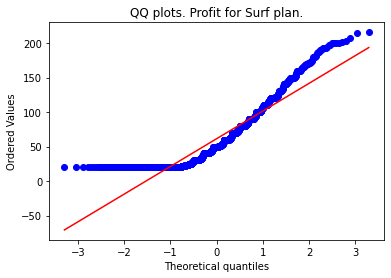

In [57]:
st.probplot(summary_surf_filtered['profit'], dist="norm", plot= plt)
plt.title("QQ plots. Profit for Surf plan.")
plt.savefig("Setosa_qqplot.png")

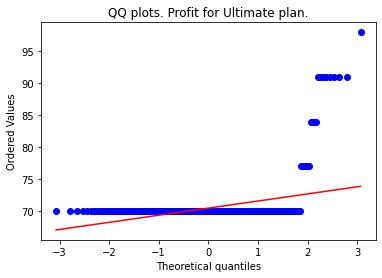

In [58]:
st.probplot(summary_ultimate_filtered['profit'], dist="norm", plot= plt)
plt.title("QQ plots. Profit for Ultimate plan.")
plt.savefig("Setosa_qqplot.png")

<div class="alert alert-danger">
    <s>The plot titles are off in the plots above
</div>

<div class="alert alert-info">
    Fixed
</div>


<div class="alert alert-success">
    <b>V2.</b>
    Good!
</div>

In [59]:
alpha = 0.01 #high significant
# Let's check our hypothesis
result = st.stats.ttest_ind(
    summary_surf_filtered['profit'],
    summary_ultimate_filtered['profit'],
    equal_var = False)
print(result.pvalue)

if (result.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

8.30114915826165e-15
We reject the null hypothesis


In [60]:
print('Average profit from Surf plan users is {:.2f}$'.format(summary_surf_filtered['profit'].mean()))
print('Average profit from Ultimate plan users is {:.2f}$'.format(summary_ultimate_filtered['profit'].mean()))

Average profit from Surf plan users is 61.34$
Average profit from Ultimate plan users is 70.47$


##### Conclusion
The hypothesis that the average profit of both tariff plans are the same has not been confirmed.

### The average profit from users in NY-NJ area is different from that of the users from other regions.
**Hypothese Null**: Average profit for residents of NY-NJ and other regions are the same
**Hypothese alternative**: Average profit for residents of NY-NJ and other regions aren't the same

In this case: **Hypothesis on the Equality of Two Population Means.**

Each sample has more than **50** records, which means the samples are large enough to test hypotheses.

In [61]:
index_users_ny_nj = users['city'].str.contains('NY-NJ', na=False, regex=True)
users_ny_nj = users[index_users_ny_nj]['user_id']
users_other = users[index_users_ny_nj == False]['user_id']
summary_surf_filtered_ny_nj = summary_surf_filtered.query('user_id in @users_ny_nj')
summary_surf_filtered_other = summary_surf_filtered.query('user_id in @users_other')

<AxesSubplot:title={'center':'Average profit from NY_NJ residents'}, ylabel='Frequency'>

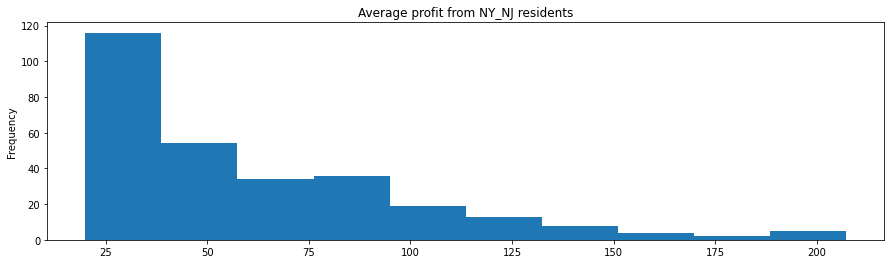

In [62]:
summary_surf_filtered_ny_nj['profit'].plot(
    kind     = 'hist'
    ,title   = 'Average profit from NY_NJ residents'
    ,figsize = (15, 4)
 )

<AxesSubplot:title={'center':'Average profit from residents of other places'}, ylabel='Frequency'>

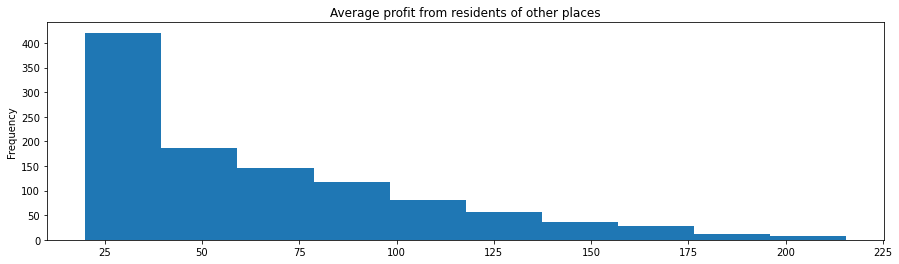

In [63]:
summary_surf_filtered_other['profit'].plot(
    kind     = 'hist'
    ,title   = 'Average profit from residents of other places'
    ,figsize = (15, 4)
 )

In [64]:
#Let's find out the variance for each samples.
print('The variance "NY_NJ" is {:}'.format(np.var(summary_surf_filtered_ny_nj['profit'])))
print('The variance "Other" is {:}'.format(np.var(summary_surf_filtered_other['profit'])))

The variance "NY_NJ" is 1759.1141937931768
The variance "Other" is 1873.0344709441963


In [65]:
alpha = 0.01
# Let's check our hypothesis
# The variances of both populations are similar.
result = st.stats.ttest_ind(
    summary_surf_filtered_ny_nj['profit'],
    summary_surf_filtered_other['profit'],
    equal_var = True)
print(result.pvalue)

if (result.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 


0.24210699327578197
We can't reject the null hypothesis


Conclusion:

The empirically obtained data does not disprove the null hypothesis, and we have no reason to argue that the average profit in NY_NJ and other regions is different.

<div class="alert alert-danger">
    <s>The statistical testing section is very nice. You removed outliers, correctly formulated the null and alternative hypotheses and used an appropriate test. Please take a look if conclusions remain the same on new data.
</div>

<div class="alert alert-info">
    As far as I understand, new data is not needed, since the correct data is used, not grouped by user_id. If I'm wrong, please indicate where the data is used, grouped by user_id.
</div>


<div class="alert alert-success">
    <b>V2.</b>
    Yeah, sorry again
</div>

### Step 5. Overall conclusion <a name="overall_conclusion"></a>

After analyzing the data obtained, I filled in the missing values, removed duplicates, identified outliers and anomalies.

Next, we analyzed the number of minutes, messages and Internet volume that users spend on each tariff plan.

Also, 2 hypotheses were tested. The hypothesis that tariff plans bring the same profit has not been confirmed. The hypothesis that residents of NY and NJ generate the same income as residents of other regions has not been refuted.

As we can see the “Ultimate” tariff plan brings more profit and we can recommend the sales department to direct the advertising budget to promote this particular tariff plan.


<div class="alert alert-danger">
    <s>The conclusions look good, but some revisions might need to be made after looking at new data.
</div>

<div class="alert alert-info">
    It seems to me that the conclusions will not change, since the analysis was initially based on correctly grouped data.
</div>


<div class="alert alert-success">
    <b>V2.</b>
    Ok, good job!
</div>